In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

import pandas
import numpy
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.graphics.gofplots as gofplots
import statsmodels.formula.api as sm
import datetime

In [43]:
data = pandas.read_csv('all_data.csv', index_col='date', parse_dates=True)

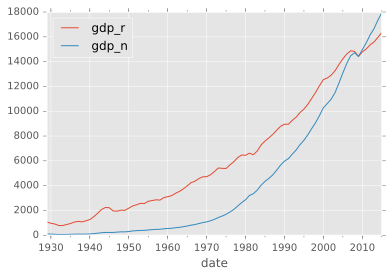

In [15]:
data[['gdp_r', 'gdp_n']].plot()
plt.show()

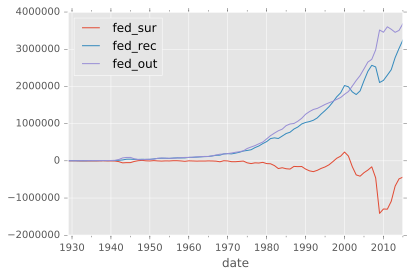

In [20]:
data[['fed_sur', 'fed_rec', 'fed_out']].plot()
plt.show()

In [97]:
data = pandas.read_csv('all_data.csv', index_col='date', parse_dates=True)
data['gdp_r_pct'] = data['gdp_r'].pct_change()
data['gdp_r_pct_lag1'] = data['gdp_r'].pct_change().shift(1)
data['gdp_r_pct_lag2'] = data['gdp_r'].pct_change().shift(2)
data['gdp_r_pct_lag3'] = data['gdp_r'].pct_change().shift(3)
data['def_pct_gdp_lag1'] = data['def_pct_gdp'].pct_change().shift(1)
data['def_pct_gdp_lag2'] = data['def_pct_gdp'].pct_change().shift(2)
data['great_depression'] = 0
data['great_depression'][data.index < datetime.datetime(1938, 1, 1)] = 1
data['ww2'] = 0
data['ww2'][(data.index < datetime.datetime(1946, 1, 1)) & (data.index > datetime.datetime(1939, 1, 1))] = 1
data['dem_senate_pct'] = data['dem_senate'] / data['total_senate']
data['dem_house_pct'] = data['dem_house'] / data['total_house']
data = data.dropna()
data

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,...,gdp_r_pct,gdp_r_pct_lag1,gdp_r_pct_lag2,gdp_r_pct_lag3,def_pct_gdp_lag1,def_pct_gdp_lag2,great_depression,ww2,dem_senate_pct,dem_house_pct
date,,,,,,,,,,,,,,,,,,,,,
1933-01-01,1,96,47,48,435,217,217,778.3,57.2,12.900,...,-0.012560,-0.128868,-0.064032,-0.085084,0.214286,0.166667,1,0,0.489583,0.498851
1934-01-01,1,96,59,36,435,313,117,862.2,66.8,13.200,...,0.107799,-0.012560,-0.128868,-0.064032,0.000000,0.214286,1,0,0.614583,0.719540
1935-01-01,1,96,59,36,435,313,117,939.0,74.3,13.600,...,0.089074,0.107799,-0.012560,-0.128868,-0.176471,0.000000,1,0,0.614583,0.719540
1936-01-01,1,96,69,25,435,322,103,1060.5,84.9,13.800,...,0.129393,0.089074,0.107799,-0.012560,0.142857,-0.176471,1,0,0.718750,0.740230
1937-01-01,1,96,69,25,435,322,103,1114.6,93.0,14.100,...,0.051014,0.129393,0.089074,0.107799,0.000000,0.142857,1,0,0.718750,0.740230
1938-01-01,1,96,75,17,435,333,89,1077.7,87.4,14.200,...,-0.033106,0.051014,0.129393,0.089074,-0.062500,0.000000,0,0,0.781250,0.765517
1939-01-01,1,96,75,17,435,333,89,1163.6,93.5,14.000,...,0.079707,-0.033106,0.051014,0.129393,0.133333,-0.062500,0,0,0.781250,0.765517
1940-01-01,1,96,69,23,435,262,169,1266.1,102.9,13.900,...,0.088089,0.079707,-0.033106,0.051014,0.058824,0.133333,0,1,0.718750,0.602299
1941-01-01,1,96,69,23,435,262,169,1490.3,129.4,14.100,...,0.177079,0.088089,0.079707,-0.033106,0.500000,0.058824,0,1,0.718750,0.602299


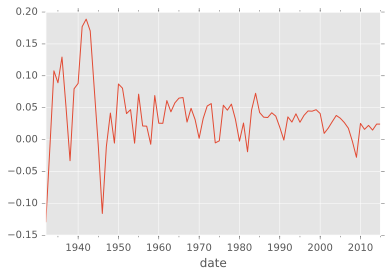

In [59]:
data['gdp_r_pct'].plot()
plt.show()

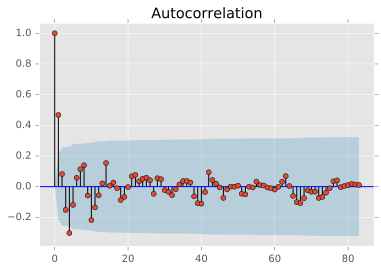

In [60]:
tsaplots.plot_acf(data['gdp_r_pct'])
plt.show()

In [75]:
model = sm.ols(formula='''
gdp_r_pct ~ gdp_r_pct_lag1 + gdp_r_pct_lag2 + gdp_r_pct_lag3 + great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdp_r_pct   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     9.695
Date:                Wed, 15 Jun 2016   Prob (F-statistic):           4.31e-09
Time:                        01:26:55   Log-Likelihood:                 172.00
No. Observations:                  83   AIC:                            -326.0
Df Residuals:                      74   BIC:                            -304.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0482      0.029     -1.679      0.097      -0.105       0.009
gdp_r_pct_lag1       0.2958      0.104      2.844      0.006       0.089       0.503
gdp_r_pct_lag2      -0.0974      0.105     -0.924      0.359      -0.308       0.113
gdp_r_pct_lag3      -0.2920      0.095     -3.069      0.003      -0.482      -0.102
great_depression     0.0029      0.018      0.162      0.871      -0.032       0.038
ww2                  0.0757      0.019      3.939      0.000       0.037       0.114
dem_pres            -0.0038      0.009     -0.433      0.666      -0.021       0.014
dem_senate_pct       0.0494      0.087      0.570      0.570      -0.123       0.222
dem_house_pct        0.1010      0.083      1.216      0.228      -0.064       0.266
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.392
Skew:                          -0.387   Prob(JB):                        0.302
Kurtosis:                       3.305   Cond. No.                         54.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

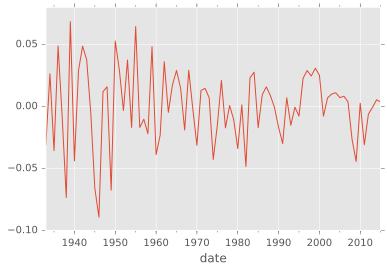

In [76]:
results.resid.plot()
plt.show()

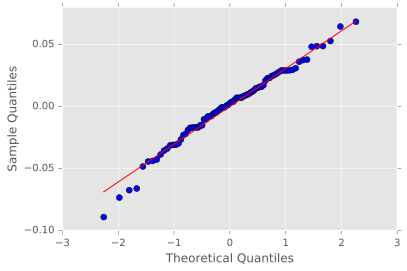

In [82]:
gofplots.qqplot(results.resid, line='s')
plt.show()

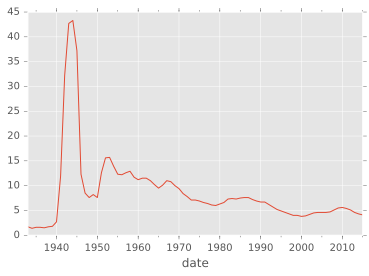

In [87]:
data['def_pct_gdp'].plot()
plt.show()

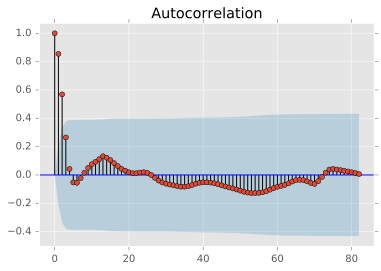

In [90]:
tsaplots.plot_acf(data['def_pct_gdp'])
plt.show()

In [98]:
model = sm.ols(formula='''
def_pct_gdp ~ def_pct_gdp_lag1 + def_pct_gdp_lag2 + great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            def_pct_gdp   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     24.73
Date:                Wed, 15 Jun 2016   Prob (F-statistic):           3.99e-17
Time:                        01:35:38   Log-Likelihood:                -236.81
No. Observations:                  83   AIC:                             489.6
Df Residuals:                      75   BIC:                             509.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.6771      3.863      2.505      0.014       1.982      17.372
def_pct_gdp_lag1     1.9625      1.433      1.369      0.175      -0.893       4.818
def_pct_gdp_lag2     7.7476      1.451      5.338      0.000       4.856      10.639
great_depression    -6.2364      2.265     -2.754      0.007     -10.748      -1.725
ww2                 10.5768      2.962      3.571      0.001       4.676      16.477
dem_pres            -0.2136      1.169     -0.183      0.856      -2.542       2.115
dem_senate_pct       2.4025     11.533      0.208      0.836     -20.572      25.377
dem_house_pct       -5.5477     11.178     -0.496      0.621     -27.815      16.720
==============================================================================
Omnibus:                       14.164   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               54.389
Skew:                           0.109   Prob(JB):                     1.55e-12
Kurtosis:                       6.960   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

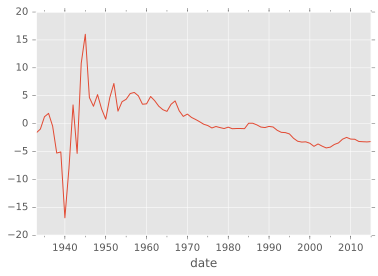

In [99]:
results.resid.plot()
plt.show()

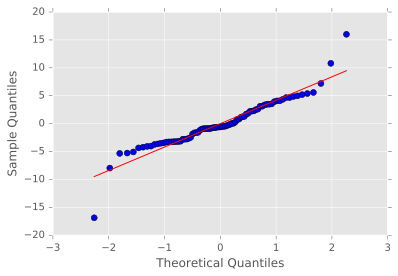

In [100]:
gofplots.qqplot(results.resid, line='s')
plt.show()